# Theano, Lasagne
and why they matter


### got no lasagne?
Install the __bleeding edge__ version from here: http://lasagne.readthedocs.org/en/latest/user/installation.html

# Warming up
* Implement a function that computes the sum of squares of numbers from 0 to N
* Use numpy or python
* An array of numbers 0 to N - numpy.arange(N)

In [11]:
import numpy as np
def sum_squares(N):
    numbers = np.arange(N)
    sumsquares = np.sum(numbers**2)
    return sumsquares

In [12]:
%%time
sum_squares(10**8)

CPU times: user 340 ms, sys: 391 ms, total: 732 ms
Wall time: 743 ms


662921401752298880

# theano teaser

Doing the very same thing

In [1]:
import theano
import theano.tensor as T

In [2]:


#I gonna be function parameter
N = T.scalar("a dimension",dtype='int32')


#i am a recipe on how to produce sum of squares of arange of N given N
result = (T.arange(N)**2).sum()

#Compiling the recipe of computing "result" given N
sum_function = theano.function(inputs = [N],outputs=result)

In [3]:
%%time
sum_function(10**8)

CPU times: user 271 ms, sys: 214 ms, total: 485 ms
Wall time: 483 ms


array(662921401752298880)

# How does it work?
* 1 You define inputs f your future function;
* 2 You write a recipe for some transformation of inputs;
* 3 You compile it;
* You have just got a function!
* The gobbledegooky version: you define a function as symbolic computation graph.


* There are two main kinвs of entities: "Inputs" and "Transformations"
* Both can be numbers, vectors, matrices, tensors, etc.
* Both can be integers, floats of booleans (uint8) of various size.


* An input is a placeholder for function parameters.
 * N from example above


* Transformations are the recipes for computing something given inputs and transformation
 * (T.arange(N)^2).sum() are 3 sequential transformations of N
 * Doubles all functions of numpy vector syntax
 * You can almost always go with replacing "np.function" with "T.function" aka "theano.tensor.function"
   * np.mean -> T.mean
   * np.arange -> T.arange
   * np.cumsum -> T.cumsum
   * and so on.
   * builtin operations also work that way
   * np.arange(10).mean() -> T.arange(10).mean()
   * Once upon a blue moon the functions have different names or locations (e.g. T.extra_ops)
     * Ask us or google it
 
 
Still confused? We gonna fix that.

In [4]:
#Inputs
example_input_integer = T.scalar("scalar input",dtype='float32')

example_input_tensor = T.tensor4("four dimensional tensor input") #dtype = theano.config.floatX by default
#не бойся, тензор нам не пригодится



input_vector = T.vector("", dtype='int32') # vector of integers


In [5]:
#Transformations

#transofrmation: elementwise multiplication
double_the_vector = input_vector*2

#elementwise cosine
elementwise_cosine = T.cos(input_vector)

#difference between squared vector and vector itself
vector_squares = input_vector**2 - input_vector


In [6]:
#Practice time:
#create two vectors of size float32
my_vector = T.vector('vector input 1', dtype='float32')
my_vector2 = T.vector('vector input 2', dtype='float32')

In [7]:
#Write a transformation(recipe):
#(vec1)*(vec2) / (sin(vec1) +1)
my_transformation = T.dot(my_vector,my_vector2)/(T.sin(my_vector)+1)

In [8]:
print my_transformation
#it's okay it aint a number

Elemwise{true_div,no_inplace}.0


# Compiling
* So far we were using "symbolic" variables and transformations
 * Defining the recipe for computation, but not computing anything
* To use the recipe, one should compile it

In [9]:
inputs = [my_vector, my_vector2]
outputs = [my_transformation]

# The next lines compile a function that takes two vectors and computes your transformation
my_function = theano.function(
    inputs,outputs,
    allow_input_downcast=True #automatic type casting for input parameters (e.g. float64 -> float32)
 )

WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


In [13]:
#using function with, lists:
print "using python lists:"
print my_function([1,2,3],[4,5,6])
print

#Or using numpy arrays:
#btw, that 'float' dtype is casted to secong parameter dtype which is float32
print "using numpy arrays:"
print my_function(np.arange(10),
                  np.linspace(5,6,10,dtype='float'))


using python lists:
[array([ 17.3774128 ,  16.76009178,  28.04262543], dtype=float32)]

using numpy arrays:
[array([  256.66668701,   139.3813324 ,   134.42991638,   224.92524719,
        1055.38378906,  6248.625     ,   356.19235229,   154.89967346,
         129.01985168,   181.76002502], dtype=float32)]


# Debugging
* Compilation can take a while for big functions
* To avoid waiting, one can evaluate transformations without compiling
* Without compilation, the code runs slower, so consider reducing input size


In [14]:
#a dictionary of inputs
my_function_inputs = {
    my_vector:[1,2,3],
    my_vector2:[4,5,6]
}

# evaluate my_transformation
# has to match with compiled function output
print my_transformation.eval(my_function_inputs)


# can compute transformations on the fly
print "add 2 vectors", (my_vector + my_vector2).eval(my_function_inputs)

#!WARNING! if your transformation only depends on some inputs,
#do not provide the rest of them
print "vector's shape:", my_vector.shape.eval({
        my_vector:[1,2,3]
    })


[ 17.3774128   16.76009178  28.04262543]
add 2 vectors [ 5.  7.  9.]
vector's shape: [3]


* Для отладки желательно уменьшить масштаб задачи. Если вы планировали послать на вход вектор из 10^9 примеров, пошлите 10~100.
* Если #ОЧЕНЬ нужно послать большой вектор, быстрее скомпилировать функцию обычным способом

# Теперь сам

In [15]:
# Quest #1 - implement a function that computes a mean squared error of two input vectors
# Your function has to take 2 vectors and return a single number

'''<student.define_inputs_and_transformations()>'''
a_v = T.vector('vector input 1')
a_v2 = T.vector('vector input 2')

mse = T.mean(T.pow((a_v-a_v2),2))
inputs = [a_v, a_v2]
outputs= [mse]

#Compiling the recipe of computing "result" given N
compute_mse = theano.function(inputs, outputs)

In [16]:
# Tests
from sklearn.metrics import mean_squared_error

for n in [1,5,10,10**3]:
    
    elems = [np.arange(n),np.arange(n,0,-1), np.zeros(n),
             np.ones(n),np.random.random(n),np.random.randint(100,size=n)]
    
    for el in elems:
        for el_2 in elems:
            true_mse = np.array(mean_squared_error(el,el_2))
            my_mse = compute_mse(el,el_2)
            if not np.allclose(true_mse,my_mse):
                print 'Wrong result:'
                print 'mse(%s,%s)'%(el,el_2)
                print "should be: %f, but your function returned %f"%(true_mse,my_mse)
                raise ValueError,"Что-то не так"

print "All tests passed"
            
    

All tests passed


# Shared variables

* The inputs and transformations only exist when function is called

* Shared variables always stay in memory like global variables
 * Shared variables can be included into a symbolic graph
 * They can be set and evaluated using special methods
   * but they can't change value arbitrarily during symbolic graph computation
   * we'll cover that later;
 
 
* Hint: such variables are a perfect place to store network parameters
 * e.g. weights or some metadata

In [17]:
#creating shared variable
shared_vector_1 = theano.shared(np.ones(10,dtype='float64'))

In [18]:

#evaluating shared variable (outside symbolicd graph)
print "initial value",shared_vector_1.get_value()

# within symbolic graph you use them just as any other inout or transformation, not "get value" needed

initial value [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [19]:
#setting new value
shared_vector_1.set_value( np.arange(5) )

#getting that new value
print "new value", shared_vector_1.get_value()

#Note that the vector changed shape
#This is entirely allowed... unless your graph is hard-wired to work with some fixed shape

new value [ 0.  1.  2.  3.  4.]


# Your turn

In [20]:
# Write a recipe (transformation) that computes an elementwise transformation of shared_vector and input_scalar
#Compile as a function of input_scalar

input_scalar = T.scalar('coefficient',dtype='float32')
shared_vector_1 = theano.shared(np.arange(5,dtype='float32'))
#print input_shared_vector.get_value()

scalar_times_shared = input_scalar*shared_vector_1

inputs = [input_scalar]
outputs = [scalar_times_shared]

shared_times_n = theano.function(inputs, outputs)

In [21]:
print "shared:", shared_vector_1.get_value()

print "shared_times_n(5)",shared_times_n(5)

print "shared_times_n(-0.5)",shared_times_n(-0.5)


shared: [ 0.  1.  2.  3.  4.]
shared_times_n(5) [array([  0.,   5.,  10.,  15.,  20.], dtype=float32)]
shared_times_n(-0.5) [array([-0. , -0.5, -1. , -1.5, -2. ], dtype=float32)]


In [22]:
#Changing value of vector 1 (output should change)
shared_vector_1.set_value([-1,0,1])
print "shared:", shared_vector_1.get_value()

print "shared_times_n(5)",shared_times_n(5)

print "shared_times_n(-0.5)",shared_times_n(-0.5)


shared: [-1.  0.  1.]
shared_times_n(5) [array([-5.,  0.,  5.], dtype=float32)]
shared_times_n(-0.5) [array([ 0.5, -0. , -0.5], dtype=float32)]


# T.grad - why theano matters
* Theano can compute derivatives and gradients automatically
* Derivatives are computed symbolically, not numerically

Limitations:
* You can only compute a gradient of a __scalar__ transformation over one or several scalar or vector (or tensor) transformations or inputs.
* A transformation has to have float32 or float64 dtype throughout the whole computation graph
 * derivative over an integer has no mathematical sense


In [30]:
my_scalar = T.scalar(name='input',dtype='float64')

scalar_squared = T.sum(my_scalar**2)

#a derivative of v_squared by my_vector
derivative = T.grad(scalar_squared,my_scalar)

fun = theano.function([my_scalar],scalar_squared)
grad = theano.function([my_scalar],derivative) 

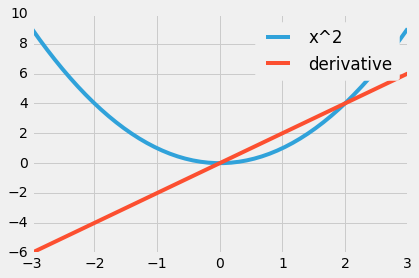

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')


x = np.linspace(-3,3)
x_squared = map(fun,x)
x_squared_der = map(grad,x)

plt.plot(x, x_squared,label="x^2")
plt.plot(x, x_squared_der, label="derivative")
plt.legend()

# Why that rocks

In [39]:

my_vector = T.vector('float64')

#Compute the gradient of the next weird function over my_scalar and my_vector
#warning! Trying to understand the meaning of that function may result in permanent brain damage

weird_psychotic_function = ((my_vector+my_scalar)**(1+T.var(my_vector)) +1./T.arcsinh(my_scalar)).mean()/(my_scalar**2 +1) + 0.01*T.sin(2*my_scalar**1.5)*(T.sum(my_vector)* my_scalar**2)*T.exp((my_scalar-4)**2)/(1+T.exp((my_scalar-4)**2))*(1.-(T.exp(-(my_scalar-4)**2))/(1+T.exp(-(my_scalar-4)**2)))**2


der_by_scalar,der_by_vector = T.grad(weird_psychotic_function, [my_scalar,my_vector])


compute_weird_function = theano.function([my_scalar,my_vector],weird_psychotic_function)
compute_der_by_scalar = theano.function([my_scalar,my_vector],der_by_scalar)


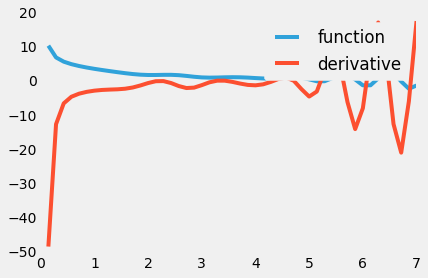

In [40]:
#Plotting your derivative
vector_0 = [1,2,3]

scalar_space = np.linspace(0,7)

y = [compute_weird_function(x,vector_0) for x in scalar_space]
plt.plot(scalar_space,y,label='function')
y_der_by_scalar = [compute_der_by_scalar(x,vector_0) for x in scalar_space]
plt.plot(scalar_space,y_der_by_scalar,label='derivative')
plt.grid();plt.legend()


# Almost done - Updates

* updates are a way of changing shared variables at after function call.

* technically it's a dictionary {shared_variable : a recipe for new value} which is has to be provided when function is compiled

That's how it works:

In [27]:
# Multiply shared vector by a number and save the product back into shared vector

inputs = [input_scalar]
outputs = [scalar_times_shared] #return vector times scalar

my_updates = {
    shared_vector_1:scalar_times_shared #and write this same result bach into shared_vector_1
}

compute_and_save = theano.function(inputs, outputs, updates=my_updates)

In [28]:
shared_vector_1.set_value(np.arange(5,dtype='float32'))

#initial shared_vector_1
print "initial shared value:" ,shared_vector_1.get_value()

# evaluating the function (shared_vector_1 will be changed)
print "compute_and_save(2) returns",compute_and_save(2)

#evaluate new shared_vector_1
print "new shared value:" ,shared_vector_1.get_value()



initial shared value: [ 0.  1.  2.  3.  4.]
compute_and_save(2) returns [array([ 0.,  2.,  4.,  6.,  8.], dtype=float32)]
new shared value: [ 0.  2.  4.  6.  8.]


# Logistic regression example

Implement the regular logistic regression training algorithm

Tips:
* Weights fit in as a shared variable
* X and y are potential inputs
* Compile 2 functions:
 * train_function(X,y) - returns error and computes weights' new values __(through updates)__
 * predict_fun(X) - just computes probabilities ("y") given data
 
 
We shall train on a two-class MNIST dataset
* please note that target y are {0,1} and not {-1,1} as in some formulae

In [23]:
from sklearn.datasets import load_digits
mnist = load_digits(2)

X,y = mnist.data, mnist.target


print "y [shape - %s]:"%(str(y.shape)),y[:10]

print "X [shape - %s]:"%(str(X.shape))
print X[:3]
print y[:10]

y [shape - (360,)]: [0 1 0 1 0 1 0 0 1 1]
X [shape - (360, 64)]:
[[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]
 [  0.   0.   0.  12.  13.   5.   0.   0.   0.   0.   0.  11.  16.   9.
    0.   0.   0.   0.   3.  15.  16.   6.   0.   0.   0.   7.  15.  16.
   16.   2.   0.   0.   0.   0.   1.  16.  16.   3.   0.   0.   0.   0.
    1.  16.  16.   6.   0.   0.   0.   0.   1.  16.  16.   6.   0.   0.
    0.   0.   0.  11.  16.  10.   0.   0.]
 [  0.   0.   1.   9.  15.  11.   0.   0.   0.   0.  11.  16.   8.  14.
    6.   0.   0.   2.  16.  10.   0.   9.   9.   0.   0.   1.  16.   4.
    0.   8.   8.   0.   0.   4.  16.   4.   0.   8.   8.   0.   0.   1.
   16.   5.   1.  11.   3.   0.   0.   0.  12.  12.  10. 

In [24]:
# inputs and shareds
shared_weights = theano.shared(np.ones(X.shape[1], dtype='float64'))
input_X = T.matrix('X', dtype='float64')
input_y = T.vector('y', dtype='float64')

In [25]:
predicted_y = T.nnet.sigmoid(input_X.dot(shared_weights)).T
##<predicted probabilities for input_X>
loss = T.mean(T.log(1 + T.exp(- 4 * (input_y - 0.5) * (input_X.dot(shared_weights) - 0.5))))
##<logistic loss (scalar, mean over sample)>

grad = T.grad(loss, shared_weights)
##<gradient of loss over model weights>
alpha = 0.1



updates = {
    shared_weights: shared_weights - alpha * grad
    ##<new weights after gradient step>
}

In [26]:
train_function = theano.function(
    inputs = [input_X, input_y],
    outputs = loss,
    updates = updates
    )

##<compile function that takes X and y, returns log loss and updates weights>
predict_function = theano.function(
    [input_X],
    predicted_y
)

#<compile function that takes X and computes probabilities of y>

In [27]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

loss at iter 0:1.4060
train auc: 0.996212121212
test auc: 0.978260869565
loss at iter 1:0.2517
train auc: 1.0
test auc: 0.978260869565
loss at iter 2:0.1554
train auc: 1.0
test auc: 0.978260869565
loss at iter 3:0.0590
train auc: 1.0
test auc: 0.989130434783
loss at iter 4:0.0001
train auc: 1.0
test auc: 0.989130434783
resulting weights:


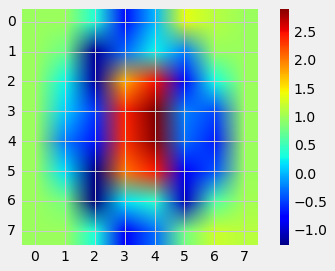

In [32]:
from sklearn.metrics import roc_auc_score

for i in range(5):
    loss_i = train_function(X_train,y_train)
    print "loss at iter %i:%.4f"%(i,loss_i)
    print "train auc:",roc_auc_score(y_train,predict_function(X_train))
    print "test auc:",roc_auc_score(y_test,predict_function(X_test))

    
print "resulting weights:"
plt.imshow(shared_weights.get_value().reshape(8,-1))
plt.colorbar()

# lasagne
* lasagne is a library for neural network building and training
* it's a low-level library with almost seamless integration with theano

For a demo we shall solve the same digit recognition problem, but at a different scale
* images are now 28x28
* 10 different digits
* 50k samples

In [45]:
from mnist import load_dataset
X_train,y_train,X_val,y_val,X_test,y_test = load_dataset()

print X_train.shape,y_train.shape

(50000, 1, 28, 28) (50000,)


In [49]:
!pip2 install -r https://raw.githubusercontent.com/Lasagne/Lasagne/master/requirements.txt

discarding /opt/conda/bin from PATH
prepending /opt/conda/envs/python2/bin to PATH
    100% |████████████████████████████████| 2.9MB 483kB/s 
  Running setup.py bdist_wheel for Theano ... - \ | done
  Stored in directory: /home/jovyan/.cache/pip/wheels/36/76/6c/9d74e5d4b3891d22ef82bc1e1b1fb4dadf026cd199bc08371c
Successfully built Theano
  Found existing installation: Theano 0.7.0
    DEPRECATION: Uninstalling a distutils installed project (Theano) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
    Uninstalling Theano-0.7.0:
      Successfully uninstalled Theano-0.7.0


In [50]:
!pip2 install https://github.com/Lasagne/Lasagne/archive/master.zip

discarding /opt/conda/bin from PATH
prepending /opt/conda/envs/python2/bin to PATH
     / 204kB 44.8MB/s
  Running setup.py install for Lasagne ... - \ done


In [55]:
!conda2 update theano

discarding /opt/conda/bin from PATH
prepending /opt/conda/envs/python2/bin to PATH
Fetching package metadata: ......
# All requested packages already installed.
# packages in environment at /opt/conda/envs/python2:
#
theano                    0.7.0               np110py27_0  


In [66]:
!pip2 install -U theano

discarding /opt/conda/bin from PATH
prepending /opt/conda/envs/python2/bin to PATH
Requirement already up-to-date: theano in /opt/conda/envs/python2/lib/python2.7/site-packages
Requirement already up-to-date: six>=1.9.0 in /opt/conda/envs/python2/lib/python2.7/site-packages (from theano)
Requirement already up-to-date: scipy>=0.11 in /opt/conda/envs/python2/lib/python2.7/site-packages (from theano)
    100% |████████████████████████████████| 15.3MB 104kB/s 
  Found existing installation: numpy 1.10.4
    DEPRECATION: Uninstalling a distutils installed project (numpy) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
    Uninstalling numpy-1.10.4:
      Successfully uninstalled numpy-1.10.4


In [46]:
import lasagne

input_X = T.tensor4("X")

#input dimention (None means "Arbitrary" and only works at  the first axes [samples])
input_shape = [None,1,28,28]

target_y = T.vector("target Y integer",dtype='int32')

Defining network architecture

In [48]:
#Input layer (auxilary)
input_layer = lasagne.layers.InputLayer(shape = input_shape,input_var=input_X)

#fully connected layer, that takes input layer and applies 50 neurons to it.
# nonlinearity here is sigmoid as in logistic regression
# you can give a name to each layer (optional)
dense_1 = lasagne.layers.DenseLayer(input_layer,num_units=50,
                                   nonlinearity = lasagne.nonlinearities.sigmoid,
                                   name = "hidden_dense_layer")

#fully connected output layer that takes dense_1 as input and has 10 neurons (1 for each digit)
#We use softmax nonlinearity to make probabilities add up to 1
dense_output = lasagne.layers.DenseLayer(dense_1,num_units = 10,
                                        nonlinearity = lasagne.nonlinearities.softmax,
                                        name='output')


In [49]:
#network prediction (theano-transformation)
y_predicted = lasagne.layers.get_output(dense_output)

In [50]:
#all network weights (shared variables)
all_weights = lasagne.layers.get_all_params(dense_output)
print all_weights

print lasagne.__version__

[hidden_dense_layer.W, hidden_dense_layer.b, output.W, output.b]
0.2.dev1


### Than you could simply
* define loss function manually
* compute error gradient over all weights
* define updates
* But that's a whole lot of work and life's short
  * not to mention life's too short to wait for SGD to converge

Instead, we shall use Lasagne builtins

In [51]:
#Mean categorical crossentropy as a loss function - similar to logistic loss but for multiclass targets
loss = lasagne.objectives.categorical_crossentropy(y_predicted,target_y).mean()

#prediction accuracy
#accuracy = lasagne.objectives.categorical_accuracy(y_predicted,target_y).mean()
accuracy = lasagne.objectives.categorical_accuracy(y_predicted,target_y).mean()

#This function computes gradient AND composes weight updates just like you did earlier
updates_sgd = lasagne.updates.sgd(loss, all_weights,learning_rate=0.01)

In [52]:
#function that computes loss and updates weights
train_fun = theano.function([input_X,target_y],[loss,accuracy],updates= updates_sgd)

#function that just computes accuracy
accuracy_fun = theano.function([input_X,target_y],accuracy)

### That's all, now let's train it!
* We got a lot of data, so it's recommended that you use SGD
* So let's implement a function that splits the training sample into minibatches

In [43]:
# An auxilary function that returns mini-batches for neural network training

#Parameters
# X - a tensor of images with shape (many, 1, 28, 28), e.g. X_train
# y - a vector of answers for corresponding images e.g. Y_train
#batch_size - a single number - the intended size of each batches

#What do need to implement
# 1) Shuffle data
# - Gotta shuffle X and y the same way not to break the correspondence between X_i and y_i
# 3) Split data into minibatches of batch_size
# - If data size is not a multiple of batch_size, make one last batch smaller.
# 4) return a list (or an iterator) of pairs
# - (подгруппа картинок, ответы из y на эту подгруппу)
def iterate_minibatches(X, y, batchsize):
    #<return an iterable of (X_batch, y_batch)  batches of images and answers for them>
    for start_idx in range(0, len(X) - batchsize + 1, batchsize):
        excerpt = slice(start_idx, start_idx + batchsize)

        yield X[excerpt], y[excerpt]


# You feel lost and wish you stayed home tonight?
# Go search for a similar function at
# https://github.com/Lasagne/Lasagne/blob/master/examples/mnist.py

# Training loop

In [53]:
import time

num_epochs = 100 #amount of passes through the data

batch_size = 50 #number of samples processed at each function call

for epoch in range(num_epochs):
    # In each epoch, we do a full pass over the training data:
    train_err = 0
    train_acc = 0
    train_batches = 0
    start_time = time.time()
    for batch in iterate_minibatches(X_train, y_train,batch_size):
        inputs, targets = batch
        train_err_batch, train_acc_batch = train_fun(inputs, targets)
        train_err += train_err_batch
        train_acc += train_acc_batch
        train_batches += 1

    # And a full pass over the validation data:
    val_acc = 0
    val_batches = 0
    for batch in iterate_minibatches(X_val, y_val, batch_size):
        inputs, targets = batch
        val_acc += accuracy_fun(inputs, targets)
        val_batches += 1

    
    # Then we print the results for this epoch:
    print("Epoch {} of {} took {:.3f}s".format(
        epoch + 1, num_epochs, time.time() - start_time))

    print("  training loss (in-iteration):\t\t{:.6f}".format(train_err / train_batches))
    print("  train accuracy:\t\t{:.2f} %".format(
        train_acc / train_batches * 100))
    print("  validation accuracy:\t\t{:.2f} %".format(
        val_acc / val_batches * 100))

Epoch 1 of 100 took 0.680s
  training loss (in-iteration):		1.891466
  train accuracy:		59.22 %
  validation accuracy:		76.44 %
Epoch 2 of 100 took 0.578s
  training loss (in-iteration):		1.207440
  train accuracy:		77.45 %
  validation accuracy:		82.86 %
Epoch 3 of 100 took 0.579s
  training loss (in-iteration):		0.867198
  train accuracy:		82.33 %
  validation accuracy:		85.88 %
Epoch 4 of 100 took 0.579s
  training loss (in-iteration):		0.701928
  train accuracy:		84.59 %
  validation accuracy:		87.36 %
Epoch 5 of 100 took 0.578s
  training loss (in-iteration):		0.606487
  train accuracy:		86.09 %
  validation accuracy:		88.07 %
Epoch 6 of 100 took 0.586s
  training loss (in-iteration):		0.544073
  train accuracy:		86.98 %
  validation accuracy:		88.72 %
Epoch 7 of 100 took 0.769s
  training loss (in-iteration):		0.499996
  train accuracy:		87.63 %
  validation accuracy:		89.22 %
Epoch 8 of 100 took 0.637s
  training loss (in-iteration):		0.467208
  train accuracy:		88.15 %
  valida

In [54]:
test_acc = 0
test_batches = 0
for batch in iterate_minibatches(X_test, y_test, 500):
    inputs, targets = batch
    acc = accuracy_fun(inputs, targets)
    test_acc += acc
    test_batches += 1
print("Final results:")
print("  test accuracy:\t\t{:.2f} %".format(
    test_acc / test_batches * 100))

if test_acc / test_batches * 100 > 99:
    print "Achievement unlocked: 80lvl Warlock!"
else:
    print "We need more magic!"

Final results:
  test accuracy:		94.77 %
We need more magic!


# A better network


* The quest is to create a network that gets at least 99% at test set
 * In case you tried several architectures and have a __detailed__ report - 97.5% "is fine too". 
 
__ There is a mini-report at the end that you will have to fill in. We recommend to read it first and fill in while you are iterating. __
 

## Tips on what can be done:



 * Network size
   * MOAR neurons, 
   * MOAR layers, 
   * Пх'нглуи мглв'нафх Ктулху Р'льех вгах'нагл фхтагн! 
   
   
   
 * Regularize to prevent overfitting
   * Add some L2 weight norm to the loss function, theano will do the rest
   * Can be done manually or via - http://lasagne.readthedocs.org/en/latest/modules/regularization.html
   
   
   
 * Better optimization - rmsprop, nesterov_momentum, adadelta, adagrad and so on.
   * Converge faster and sometimes reach better optima
   * It might make sense to tweak learning rate, other learning parameters, batch size and number of epochs
   
   
   
 * Dropout - to prevent overfitting
   * `lasagne.layers.DropoutLayer(prev_layer, p=probability_to_zero_out)`
   
   
   
 * Convolution layers
   * `network = lasagne.layers.Conv2DLayer(prev_layer,`
    `                       num_filters = n_neurons,`
    `                        filter_size = (filter width, filter height),`
    `                        nonlinearity = some_nonlinearity)`
   * Warning! Training convolutional networks can take long without GPU.
     * If you are CPU-only, we still recomment to try a simple convolutional architecture
     * a perfect option is if you can set it up to run at nighttime and check it up at the morning.
 
 * Plenty other layers and architectures
   * http://lasagne.readthedocs.org/en/latest/modules/layers.html
   * batch normalization, pooling, etc
   
   
 * Nonlinearities in the hidden layers
   * tanh, relu, leaky relu, etc
   
 
 
   
There is a template for your solution below that you can opt to use or throw away and write it your way

In [55]:
from mnist import load_dataset
X_train,y_train,X_val,y_val,X_test,y_test = load_dataset()

print X_train.shape,y_train.shape

(50000, 1, 28, 28) (50000,)


In [56]:
import lasagne

input_X = T.tensor4("X")

#input dimention (None means "Arbitrary" and only works at  the first axes [samples])
input_shape = [None,1,28,28]

target_y = T.vector("target Y integer",dtype='int32')

In [59]:
#Input layer (auxilary)
input_layer = lasagne.layers.InputLayer(shape = input_shape,input_var=input_X)

#<student.code_neural_network_architecture()>
convolutional_layer = lasagne.layers.Conv2DLayer(
    input_layer,
    num_filters = 24,
    filter_size = (5, 5),
    nonlinearity = lasagne.nonlinearities.elu
)

max_pool_layer = lasagne.layers.MaxPool2DLayer(
    incoming = convolutional_layer,
    pool_size = (4, 4),
    ignore_border = True
)

dense_layer = lasagne.layers.DenseLayer(
    max_pool_layer,
    num_units= 100,
    nonlinearity = lasagne.nonlinearities.elu,
    name = 'dense_layer'
)


dense_output = lasagne.layers.DenseLayer(
    dense_layer,
    num_units = 10,
    nonlinearity = lasagne.nonlinearities.softmax,
    name='output'
)
#<your network output>

In [60]:
# Network predictions (theano-transformation)
y_predicted = lasagne.layers.get_output(dense_output)

In [61]:
#All weights (shared-varaibles)
# "trainable" flag means not to return auxilary params like batch mean (for batch normalization)
all_weights = lasagne.layers.get_all_params(dense_output,trainable=True)
print all_weights

[W, b, dense_layer.W, dense_layer.b, output.W, output.b]


In [63]:
#loss function
loss = lasagne.objectives.categorical_crossentropy(y_predicted, target_y).mean()

#<loss function>
#<optionally add regularization>
loss +=  1e-4 * lasagne.regularization.regularize_network_params(dense_output, lasagne.regularization.l2)

accuracy = lasagne.objectives.categorical_accuracy(y_predicted, target_y).mean()
#<mean accuracy score for evaluation> 

#weight updates
updates = lasagne.updates.nesterov_momentum(loss, all_weights, learning_rate=0.05, momentum=0.9)
#<try different update methods>

In [65]:
#A function that accepts X and y, returns loss functions and performs weight updates
train_fun = theano.function(
    [input_X,target_y],
    [loss,accuracy],
    updates= updates
)

#A function that just computes accuracy given X and y
accuracy_fun = theano.function([input_X,target_y],accuracy)

In [67]:
#итерации обучения

num_epochs = 200
#<how many times to iterate over the entire training set>

batch_size = 50
#<how many samples are processed at a single function call>

for epoch in range(num_epochs):
    # In each epoch, we do a full pass over the training data:
    train_err = 0
    train_acc = 0
    train_batches = 0
    start_time = time.time()
    for batch in iterate_minibatches(X_train, y_train,batch_size):
        inputs, targets = batch
        train_err_batch, train_acc_batch= train_fun(inputs, targets)
        train_err += train_err_batch
        train_acc += train_acc_batch
        train_batches += 1

    # And a full pass over the validation data:
    val_acc = 0
    val_batches = 0
    for batch in iterate_minibatches(X_val, y_val, batch_size):
        inputs, targets = batch
        val_acc += accuracy_fun(inputs, targets)
        val_batches += 1

    
    # Then we print the results for this epoch:
    print("Epoch {} of {} took {:.3f}s".format(
        epoch + 1, num_epochs, time.time() - start_time))

    print("  training loss (in-iteration):\t\t{:.6f}".format(train_err / train_batches))
    print("  train accuracy:\t\t{:.2f} %".format(
        train_acc / train_batches * 100))
    print("  validation accuracy:\t\t{:.2f} %".format(
        val_acc / val_batches * 100))

Epoch 1 of 200 took 58.046s
  training loss (in-iteration):		0.192465
  train accuracy:		94.81 %
  validation accuracy:		98.02 %
Epoch 2 of 200 took 58.072s
  training loss (in-iteration):		0.090716
  train accuracy:		98.20 %
  validation accuracy:		98.39 %
Epoch 3 of 200 took 58.180s
  training loss (in-iteration):		0.074603
  train accuracy:		98.70 %
  validation accuracy:		98.81 %
Epoch 4 of 200 took 58.242s
  training loss (in-iteration):		0.064002
  train accuracy:		99.10 %
  validation accuracy:		98.63 %
Epoch 5 of 200 took 58.269s
  training loss (in-iteration):		0.057158
  train accuracy:		99.30 %
  validation accuracy:		98.76 %
Epoch 6 of 200 took 58.335s
  training loss (in-iteration):		0.052887
  train accuracy:		99.47 %
  validation accuracy:		98.75 %
Epoch 7 of 200 took 58.194s
  training loss (in-iteration):		0.048482
  train accuracy:		99.58 %
  validation accuracy:		98.83 %
Epoch 8 of 200 took 58.434s
  training loss (in-iteration):		0.046180
  train accuracy:		99.62 %


KeyboardInterrupt: 

In [68]:
test_acc = 0
test_batches = 0
for batch in iterate_minibatches(X_test, y_test, 500):
    inputs, targets = batch
    acc = accuracy_fun(inputs, targets)
    test_acc += acc
    test_batches += 1
print("Final results:")
print("  test accuracy:\t\t{:.2f} %".format(
    test_acc / test_batches * 100))

if test_acc / test_batches * 100 > 99:
    print "Achievement unlocked: 80lvl Warlock!"
else:
    print "We need more magic!"

Final results:
  test accuracy:		99.04 %
Achievement unlocked: 80lvl Warlock!


Report

All creative approaches are highly welcome, but at the very least it would be great to mention
* the idea;
* brief history of tweaks and improvements;
* what is the final architecture and why?
* what is the training method and, again, why?
* Any regularizations and other techniques applied and their effects;


There is no need to write strict mathematical proofs (unless you want to).
 * "I tried this, this and this, and the second one turned out to be better. And i just didn't like the name of that one" - OK, but can be better
 * "I have analized these and these articles|sources|blog posts, tried that and that to adapt them to my problem and the conclusions are such and such" - the ideal one
 * "I took that code that demo without understanding it, but i'll never confess that and instead i'll make up some pseudoscientific explaination" - __not_ok__

### Hi, my name is `Rodrigo Rivera`, and here's my story

A long ago in a galaxy far far away, when it was still more than an hour before deadline, i got an idea:

##### I gonna build a neural network, that
is capable of meeting the requested requirements and can be submitted on time for the deadline

How could i be so naive?!

My biggest mistake was the reluctance in the beginning to use a convolutional layer. I do not have any GPU available, only CPU. I knew from the previous seminars and classes that ReLU or ELU were sensible choices. Moreover, during the last homeworks I realized that starting with a 0.03< learning rate <= 0.09 leads to good results. The previous assignments also showed that including momentum is a good idea, as long as mu<1. I also had noticed that "jacking up" both momentum and learning rate is a bad idea. Another good choice was to use nesterov momentum based on the results of the optimisation homework. I saw that even if I did not do the best choices in my selection of hyperparamets, it behaved smoothly. I was however unsure on the exact architecture of the network, if I should modify the batch sizes and the number of epochs.

I decided to keep the batch size and play with the number of epochs. I left it first with the original default (100, 50), hoping that with the points discussed above I would have better performance. I also decided to leave the number of units for the dense layers untouched (50 and 10). 
My plan was to leave everything basically untouched but with an alternative to sgd, another learning rate, a momentum, and a different loss function achieve a better performance. I saw minor improvements.

I realised I would need to include additional layers and play with the number of units. However, I did not want to increase the number of variables to update, so I left everything equal. I tried with multiple configuration of hidden layers. Yet, I would still hit 97%.

I increased the number of units and played with various configurations, I decided to leave them at (100, 10). After reading the documentation of lasagne, it came the idea to use maxpooling. Yet, I was still not getting the results I wanted and I had already spent too much time in this task. I decided to include a convolutional layer and increase the batch size. Overall it was too slow.

I thought it was already getting too "convoluted" with too many layers just for the sake of having them, I dropped them while keeping the convolutional layer and the max pooling. I decided to reduce the batch size as it was originally and give a final try before giving up.

Finally, I left the network running while I was away of the computer. After I came back I noticed that even though it had not finished the amount of epochs, it had already an accuracy of 99% in the validation. I decided to stop it, had I been in front of the computer paying attention, I could have stopped the training process much earlier.


That, having wasted 3 [minutes, hours or => days] of my life training, got

* accuracy on training: 99.97
* accuracy on validation: 99%
* accuracy on test: 99.04%


[an optional afterword and mortal curses on assignment authors]
As a suggestion, I would like to request if:
* The seminar could be more "goal oriented". The impression I have after speaking with my peers is that it is not worth the time coming. I would like that instead of some Q&A session as it is the current format, we would have real life advice on best practices for neural networks. I realize how constructing an efficient and effective network is more an art than a science and many best practices are only known through tips & tricks, (obscure) papers, blog posts, etc.
* The assignments could have a consistent level of difficulty. Some have taken me a couple hours, this for example took me more than 3 days. The difficulty arises not only due to the waiting time to train a NN without GPU, but also from the things requested. The homeworks require to do a lot of reading outside class and although the amount of code-writing requested is reasonable, coming up with a solution is very time consuming. I wish there could be more handholding.
* The assigments could take into account that not everyone has GPU available and that not everybody is an enrolled student at Skoltech (for terminal access/vpn access). Although it is desirable to use GPU, homeworks should not depend on it. Otherwise it takes unnecesarily long.
* Reduce the amount of assignments per week. The only possibility to succeed with the pace of this course is if students are fully dedicated to it (few additional classes, no external responsibilities). I would suggest that either this course is extended to 2 modules or that the number of assignments is reduced or their complexity simplified (see point above)
* Most of my knowledge for this task came from the previous homeworks. I wish we could have had a homework dedicated only to layers and design choices (see poing above). Although overall I think we have too many homeworks, maybe these type of excercises could be explored in the seminars (see point above).

Nevertheless, I must acknowledge that I am finding this subject quite challenging, interesting and I am keen on learning more.